<center><font size="10">Damien Vimala Hailson</font></center>
<br><center><font size="6">Github Username: Damien-Hailson</font></center>
<br><center><font size="6">Random Forest and XG Boost Trees</font></center>

## 1. Tree-Based Methods

Import packages

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import math
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc, accuracy_score
from sklearn.model_selection import LeaveOneOut, GridSearchCV,StratifiedKFold ,KFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.image as mpimg
from sklearn import svm

### (a) Download the APS Failure data

In [79]:
# loading training data set
train_df=pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20,na_values='na')
train_df

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [80]:
#loading test dataset
test_df=pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20,na_values='na')
test_df

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

The following are some of the commonly used imputation tenchiniques

#### 1) univariate Imputation

This algorithm imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. SimpleImputer).  Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located  

#### 2) multivariate Imputation
 
These use the entire set of available feature dimensions to estimate the missing values (e.g. IterativeImputer). The IterativeImputer class models each feature with missing values as a function of other features, and uses that estimate for imputation.

#### 3) Nearest neighbours imputation

Nearest Neighbor Imputation is a technique used to impute missing values in a dataset by replacing them with the values of the nearest neighbors. It's a simple and intuitive imputation method that can be particularly useful for datasets where the missing values are not randomly distributed.

I am using univariate imputation with mean to deal with missing values

In [81]:
train_x, train_y = train_df.iloc[:, 1:], train_df.iloc[:, 0:1]
test_x, test_y = test_df.iloc[:, 1:], test_df.iloc[:, 0:1]

In [82]:
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
train_x_imputed=pd.DataFrame(imputer.fit_transform(train_x), columns = train_x.columns)
test_x_imputed=pd.DataFrame(imputer.fit_transform(test_x), columns = test_x.columns)

#### (ii) Calculate the coefficient of variation

In [83]:
cv_results = {} 
for col in train_x_imputed.columns:
    mu = train_x_imputed[col].mean()
    sigma = train_x_imputed[col].std()
    cv_results[col] = [mu, sigma, sigma/mu]
cv_results = pd.DataFrame(cv_results)
cv_results.index = ['mu', 'std', 'cv']
cv_results

aa_000    ab_000        ac_000        ad_000      ae_000  \
mu    59336.499567  0.713189  3.560143e+08  1.906206e+05    6.819130   
std  145430.056532  1.660588  7.724678e+08  3.504515e+07  158.142022   
cv        2.450938  2.328400  2.169767e+00  1.838476e+02   23.190937   

         af_000        ag_000        ag_001         ag_002         ag_003  \
mu    11.006817    221.636367    975.722261    8606.014529   88591.281094   
std  205.375337  20363.631242  34008.750683  149479.100501  757459.796689   
cv    18.658921     91.878565     34.854950      17.369143       8.550049   

     ...        ee_002         ee_003        ee_004        ee_005  \
mu   ...  4.454897e+05  211126.447302  4.457343e+05  3.939462e+05   
std  ...  1.149060e+06  540272.166338  1.161763e+06  1.114758e+06   
cv   ...  2.579319e+00       2.558998  2.606402e+00  2.829722e+00   

           ee_006        ee_007         ee_008        ee_009     ef_000  \
mu   3.330582e+05  3.462714e+05  138729.983179   8388.914629   0.090579   
std  1.063164e+06  1.718366e+06  446989.425928  47204.242869   4.268529   
cv   3.192128e+00  4.962483e+00       3.222010      5.626979  47.124953   

        eg_000  
mu    0.212756  
std   8.627929  
cv   40.553250  

[3 rows x 170 columns]

#### (iii) Plot a correlation matrix

In [84]:
correlation = train_x_imputed.corr()
correlation.style.background_gradient(cmap = 'coolwarm')

C:\Users\damie\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\damie\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


#### (iv) Make scatter plots and box plots

In [87]:
selected_feature_index = np.argsort(cv_results.iloc[2])[::-1][:math.floor(math.sqrt(170))]
selected_features = train_x_imputed.columns[selected_feature_index]
print('Selected features:')
cv_results[selected_features][2:].T

Selected features:


cv
cs_009  235.277605
cf_000  184.233092
co_000  183.949017
ad_000  183.847620
dh_000  114.984991
dj_000  109.647285
ag_000   91.878565
as_000   86.416904
ay_009   83.786063
az_009   76.967978
ak_000   74.526688
au_000   68.160554
ch_000   58.268229

In [86]:
pair_plot_df=train_x_imputed[selected_features]
pair_plot_df['class']=train_y['class']

C:\Users\damie\AppData\Local\Temp\ipykernel_26224\1322924441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_plot_df['class']=train_y['class']


C:\Users\damie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


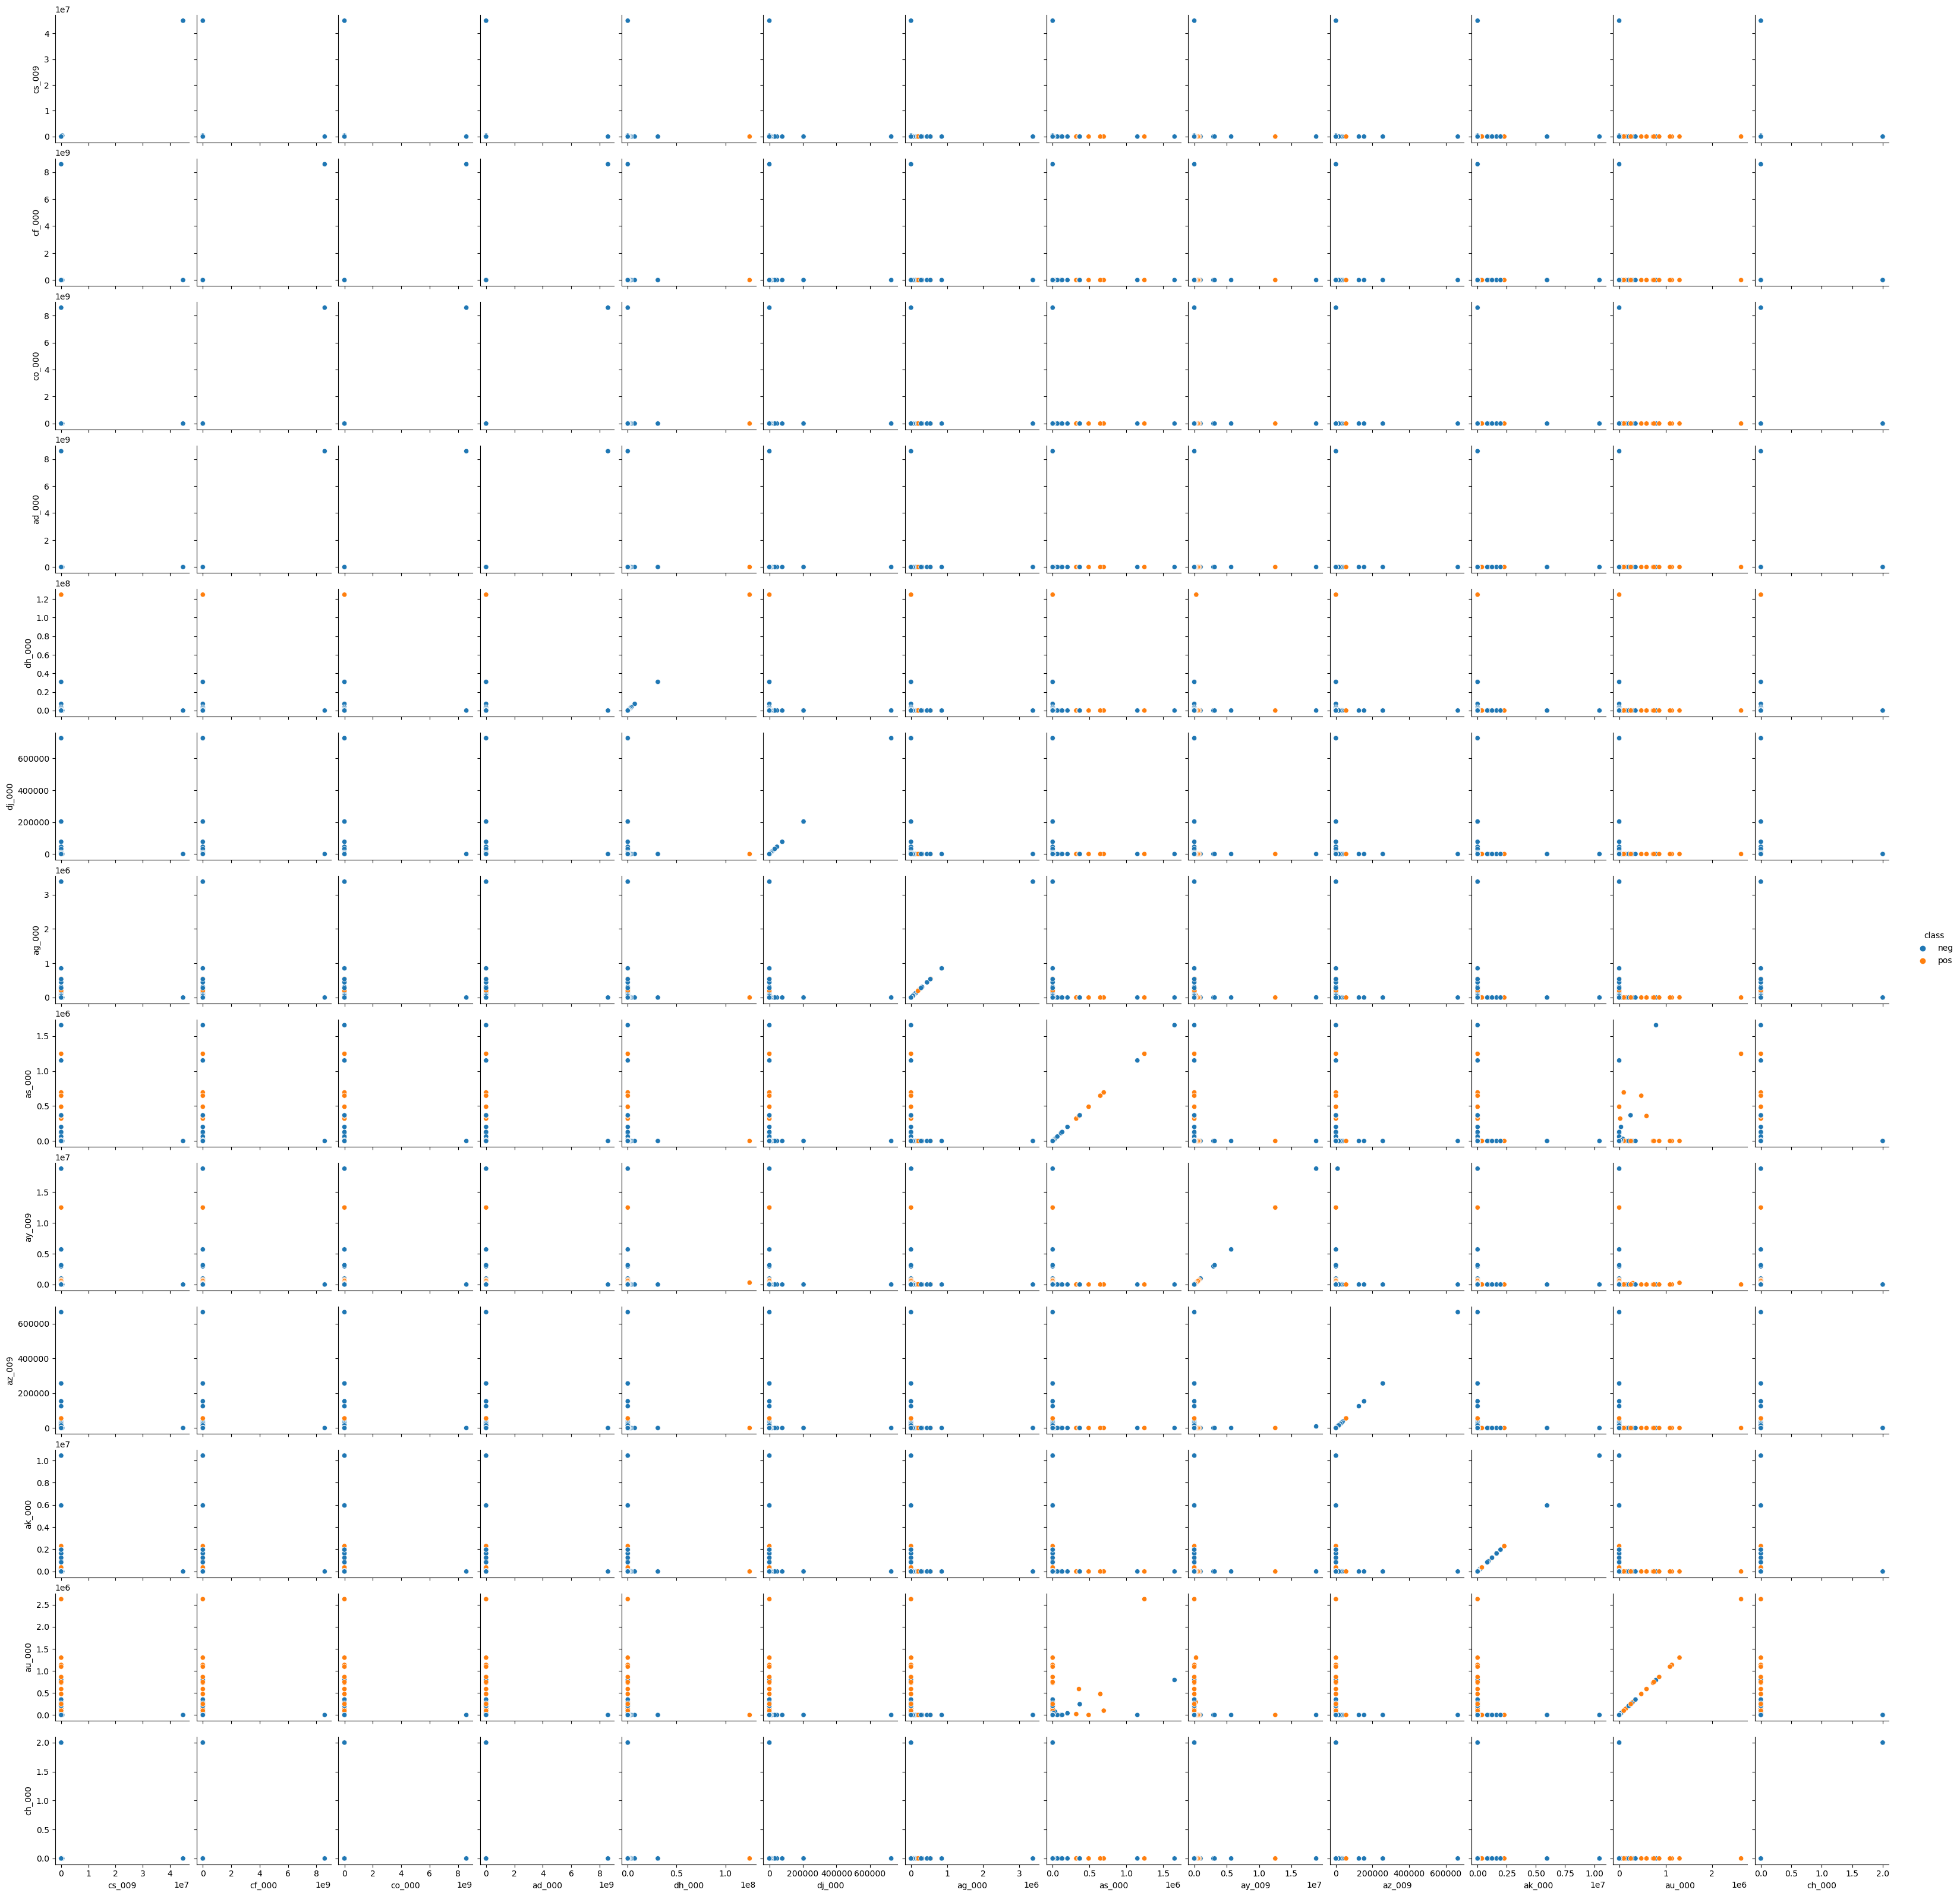

In [32]:
sns.pairplot(data = pair_plot_df, diag_kind = None, hue='class')

[None]

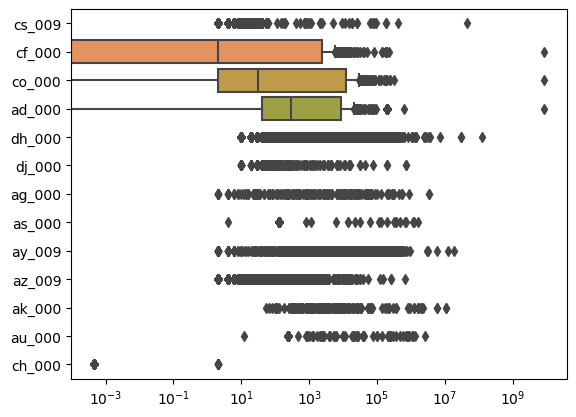

In [10]:
box_plot = sns.boxplot(data = train_x_imputed[selected_features], orient = 'h')
box_plot.set(xscale = "log")

### Findings:

* Just visual inspection of the scatter and box plot, I am not able to comment on significance of the predictors indentified by coef of variation

#### (v) Is this data set imbalanced?

In [88]:
print("class variable split for training dataset")
print(train_y.value_counts())
print("class variable split for test dataset")
print(test_y.value_counts())

class variable split for training dataset
class
neg      59000
pos       1000
Name: count, dtype: int64
class variable split for test dataset
class
neg      15625
pos        375
Name: count, dtype: int64


Probability of positive class in training dataset = 1/60 = 0.0167
Probability of positive class in test dataset = 375/16000 = 0.0234

Positive classes are severly lesser in proportion. The dataset is imbalanced

### (c) Train a random forest

In [89]:
train_y_changed=train_y['class'].map({'pos': 1, 'neg': 0})
test_y_changed=test_y['class'].map({'pos': 1, 'neg': 0})

In [90]:
model = RandomForestClassifier(max_depth = 8, random_state = 42, oob_score = True)
model.fit(train_x_imputed, np.array(train_y_changed))

RandomForestClassifier(max_depth=8, oob_score=True, random_state=42)

In [91]:
train_y_predicted = model.predict(train_x_imputed)
train_y_prob = model.predict_proba(train_x_imputed)
conf_matrix = confusion_matrix(train_y_changed, train_y_predicted)
print(f'Confusion Matrix: \n{conf_matrix}\n')

Confusion Matrix: 
[[58997     3]
 [  250   750]]



In [92]:
train_accuracy = round(accuracy_score(train_y_changed, train_y_predicted), 4)
print(f'Training Accuracy Score: {train_accuracy}')
train_error=round(1 - train_accuracy, 4)
print(f'Training Error: {train_error}')

Training Accuracy Score: 0.9958
Training Error: 0.0042


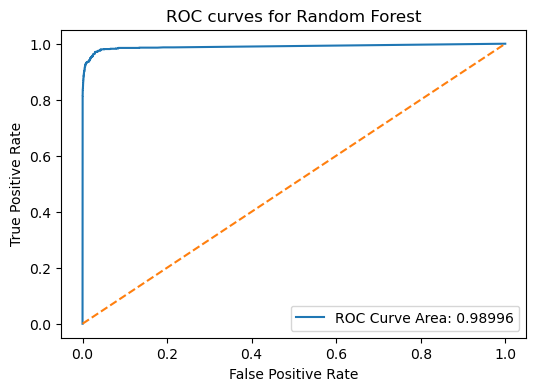

In [93]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y = train_y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(train_y, predicted_y, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [94]:
test_y_predicted = model.predict(test_x_imputed)
test_y_prob = model.predict_proba(test_x_imputed)
conf_matrix_test = confusion_matrix(test_y_changed, test_y_predicted)
print(f'Confusion Matrix: \n{conf_matrix_test}\n')

Confusion Matrix: 
[[15611    14]
 [  138   237]]



In [95]:
TN=conf_matrix_test[0][0]
FN=conf_matrix_test[1][0]
TP=conf_matrix_test[1][1]
FP=conf_matrix_test[0][1]
recall_test_unb=round(TP/(TP+FN),4)
precision_test_unb=round(TP/(TP+FP),4)

In [96]:
test_accuracy = round(accuracy_score(test_y_changed, test_y_predicted), 4)
print(f'Test Accuracy Score: {test_accuracy}')
test_error=round(1 - test_accuracy, 4)
print(f'Test Error: {test_error}')

Test Accuracy Score: 0.9905
Test Error: 0.0095


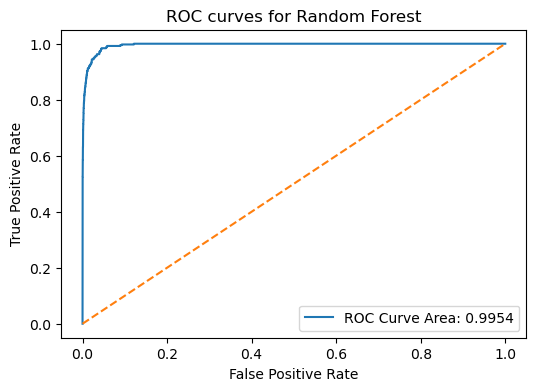

In [97]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_test = test_y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, predicted_y_test, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [98]:
train_oob_error = round(1 - model.oob_score_, 4)
print("Train OOB Error: {}".format(train_oob_error))
print("Testing Error: {}".format(test_error))

Train OOB Error: 0.0075
Testing Error: 0.0095


In [99]:
# comparison
if train_oob_error>test_error:
    print("Testing error is better than train OOB error")
else:
    print("Testing error is worse than train OOB error")

Testing error is worse than train OOB error


### (d) Research class imbalance in random forest

Here's how class imbalance is typically handled in the random forest algorithm:

**Class Weighting:** One common approach is to adjust the class weights during the training process. In scikit-learn's RandomForestClassifier, for example, you can use the class_weight parameter to specify weights for each class. By assigning higher weights to samples from the minority class and lower weights to samples from the majority class, you can effectively balance the influence of different classes during model training.

**Sampling Techniques:** Sampling techniques such as oversampling and undersampling can be used to balance the class distribution before training the random forest model. Oversampling involves randomly duplicating samples from the minority class, while undersampling involves randomly removing samples from the majority class. Another popular technique is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class based on the characteristics of existing minority samples.

**Cost-Sensitive Learning:** In cost-sensitive learning, the objective function of the algorithm is modified to account for the costs associated with misclassifying different classes. By assigning higher costs to misclassifications of the minority class, the algorithm learns to prioritize correct classification of the minority class even if it results in higher overall error.

**Ensemble Techniques:** Ensemble techniques such as bagging and boosting can be used to combine multiple random forest models trained on different balanced subsets of the data. By aggregating the predictions of multiple models, ensemble techniques can often improve the overall performance, particularly on imbalanced datasets.

**Evaluation Metrics:** When evaluating the performance of a random forest model on imbalanced data, it's important to use appropriate evaluation metrics that take class imbalance into account. Metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC) are commonly used for this purpose.


A **balanced random forest handles imbalance in class by randomly sub sampling boot strap datasets**. This can be performed in scikit learn's Random Forest Classifier using class_weight='balanced'

In [100]:
model_balanced = RandomForestClassifier(max_depth = 8, random_state = 42, 
                                          class_weight = 'balanced', oob_score = True)
model_balanced.fit(train_x_imputed, np.array(train_y_changed))

RandomForestClassifier(class_weight='balanced', max_depth=8, oob_score=True,
                       random_state=42)

In [101]:
train_y_predicted_bal = model_balanced.predict(train_x_imputed)
train_y_prob_bal = model_balanced.predict_proba(train_x_imputed)
conf_matrix = confusion_matrix(train_y_changed, train_y_predicted_bal)
print(f'Confusion Matrix: \n{conf_matrix}\n')

Confusion Matrix: 
[[57551  1449]
 [   18   982]]



In [102]:
train_accuracy_bal = round(accuracy_score(train_y_changed, train_y_predicted_bal), 4)
print(f'Training Accuracy Score: {train_accuracy_bal}')
train_error_bal=round(1 - train_accuracy_bal, 4)
print(f'Training Error: {train_error_bal}')

Training Accuracy Score: 0.9756
Training Error: 0.0244


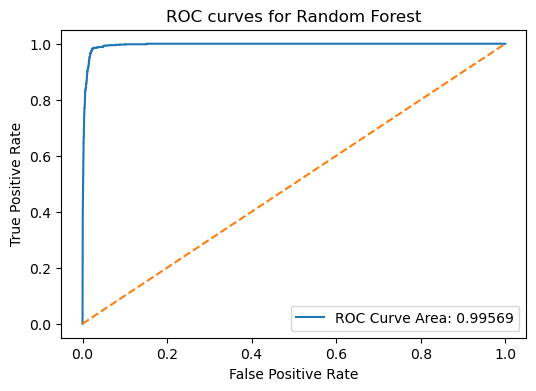

In [103]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_bal = train_y_prob_bal[:, 1]
fpr, tpr, thresholds = roc_curve(train_y, predicted_y_bal, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [104]:
test_y_predicted_bal = model_balanced.predict(test_x_imputed)
test_y_prob_bal = model_balanced.predict_proba(test_x_imputed)
conf_matrix_test = confusion_matrix(test_y_changed, test_y_predicted_bal)
print(f'Confusion Matrix: \n{conf_matrix_test}\n')

Confusion Matrix: 
[[15253   372]
 [   23   352]]



In [105]:
TN=conf_matrix_test[0][0]
FN=conf_matrix_test[1][0]
TP=conf_matrix_test[1][1]
FP=conf_matrix_test[0][1]
recall_test_bal=round(TP/(TP+FN),4)
precision_test_bal=round(TP/(TP+FP),4)

In [106]:
test_accuracy_bal = round(accuracy_score(test_y_changed, test_y_predicted_bal), 4)
print(f'Test Accuracy Score: {test_accuracy_bal}')
test_error_bal=round(1 - test_accuracy_bal, 4)
print(f'Test Error: {test_error_bal}')

Test Accuracy Score: 0.9753
Test Error: 0.0247


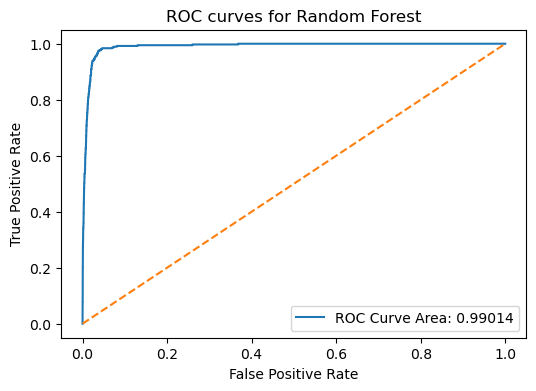

In [107]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_test_bal = test_y_prob_bal[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, predicted_y_test_bal, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [108]:
train_oob_error_bal = round(1 - model_balanced.oob_score_, 4)
print("Train OOB Error: {}".format(train_oob_error_bal))
print("Testing Error: {}".format(test_error_bal))

Train OOB Error: 0.0271
Testing Error: 0.0247


In [109]:
# comparison
if train_oob_error_bal>test_error_bal:
    print("Testing error is better than train OOB error")
else:
    print("Testing error is worse than train OOB error")

Testing error is better than train OOB error


#### comparision with 1 c)

In [110]:
print("In terms of misclassification error rate:")
print("\nBalanced:",test_error_bal)
print("Un Balanced:",test_error)
if test_error>test_error_bal:
    print("\nBalanced random forest performs better")
else:
    print("\nBalanced random forest performs worser")
    
print("\nIn terms of recall:")
print("\nBalanced:",recall_test_bal)
print("Un Balanced:",recall_test_unb)
if recall_test_bal>recall_test_unb:
    print("\nBalanced random forest performs better")
else:
    print("\nBalanced random forest performs worser")
    
print("\nIn terms of precision:")
print("\nBalanced:",precision_test_bal)
print("Un Balanced:",precision_test_unb)
if precision_test_bal>precision_test_unb:
    print("\nBalanced random forest performs better")
else:
    print("\nBalanced random forest performs worser")
    
# 

In terms of misclassification error rate:

Balanced: 0.0247
Un Balanced: 0.0095

Balanced random forest performs worser

In terms of recall:

Balanced: 0.9387
Un Balanced: 0.632

Balanced random forest performs better

In terms of precision:

Balanced: 0.4862
Un Balanced: 0.9442

Balanced random forest performs worser


### (e) XGBoost and Model Trees

In [111]:
model_xgb = XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.25, learning_rate = 0.1, max_depth = 5, use_label_encoder = False)

In [112]:
param_grid = {
    "reg_alpha": [0.001, 0.005, 0.01, 0.05, 0.075, 0.1,1,10]
}

In [113]:
gridcv_object = GridSearchCV(model_xgb, param_grid, n_jobs = -1, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring = "accuracy")

In [114]:
gridcv_object.fit(train_x_imputed, train_y_changed)
best_alpha = gridcv_object.best_params_['reg_alpha']
print('The best alpha: ', best_alpha)
print('Best CV training accuracy: ',round(gridcv_object.best_score_, 4))

The best alpha:  0.1
Best CV training accuracy:  0.9943


In [115]:
model_xgb = XGBClassifier(objective = 'binary:logistic', reg_alpha=best_alpha,colsample_bytree = 0.25, learning_rate = 0.1, max_depth = 5, use_label_encoder = False)

In [116]:
model_xgb.fit(train_x_imputed, train_y_changed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
train_y_predicted_xgb = model_xgb.predict(train_x_imputed)
train_y_prob_xgb = model_xgb.predict_proba(train_x_imputed)
conf_matrix = confusion_matrix(train_y_changed, train_y_predicted_xgb)
print(f'Confusion Matrix: \n{conf_matrix}\n')

Confusion Matrix: 
[[58989    11]
 [  100   900]]



In [118]:
train_accuracy_xgb = round(accuracy_score(train_y_changed, train_y_predicted_xgb), 4)
print(f'Training Accuracy Score: {train_accuracy_xgb}')
train_error_xgb=round(1 - train_accuracy_xgb, 4)
print(f'Training Error: {train_error_xgb}')

Training Accuracy Score: 0.9981
Training Error: 0.0019


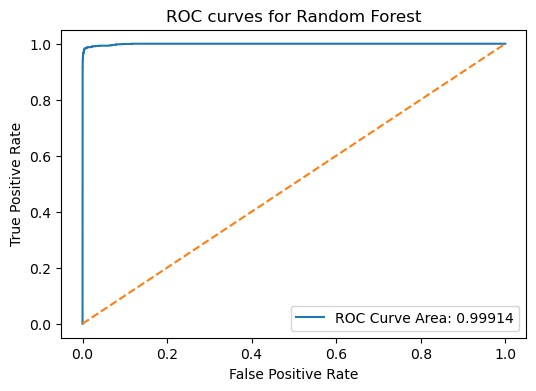

In [119]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_xgb = train_y_prob_xgb[:, 1]
fpr, tpr, thresholds = roc_curve(train_y, predicted_y_xgb, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [120]:
test_y_predicted_xgb = model_xgb.predict(test_x_imputed)
test_y_prob_xgb = model_xgb.predict_proba(test_x_imputed)
conf_matrix = confusion_matrix(test_y_changed, test_y_predicted_xgb)
print(f'Confusion Matrix: \n{conf_matrix}\n')

Confusion Matrix: 
[[15602    23]
 [   74   301]]



In [121]:
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
TP=conf_matrix[1][1]
FP=conf_matrix[0][1]
recall_test_non_smote=round(TP/(TP+FN),4)
precision_test_non_smote=round(TP/(TP+FP),4)

In [122]:
test_accuracy_xgb = round(accuracy_score(test_y_changed, test_y_predicted_xgb), 4)
print(f'Test Accuracy Score: {test_accuracy_xgb}')
test_error_xgb=round(1 - test_accuracy_xgb, 4)
print(f'Test Error: {test_error_xgb}')

Test Accuracy Score: 0.9939
Test Error: 0.0061


In [123]:
# comparison
if train_error_xgb>test_error_xgb:
    print("Test error is better than train error")
else:
    print("Test error is worse than train error")

Test error is worse than train error


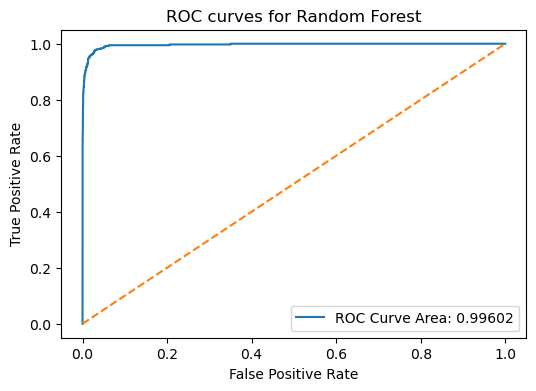

In [124]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_xgb_test = test_y_prob_xgb[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, predicted_y_xgb_test, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

### (f) Use SMOTE to pre-process your data

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
smote = SMOTE()
train_x_smote, train_y_smote = smote.fit_resample(train_x_imputed, train_y_changed)

In [127]:
model_xgb_smote = XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.25, learning_rate = 0.1, max_depth = 5, use_label_encoder = False)

In [128]:
param_grid = {
    "reg_alpha": [0.001, 0.005, 0.01, 0.05, 0.075, 0.1,1,10]
}

In [129]:
gridcv_object_smote = GridSearchCV(model_xgb_smote, param_grid, n_jobs = -1, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring = "accuracy")

In [130]:
gridcv_object_smote.fit(train_x_smote, train_y_smote)
best_alpha_smote = gridcv_object_smote.best_params_['reg_alpha']
print('The best alpha: ', best_alpha)
print('Best CV training accuracy: ',round(gridcv_object_smote.best_score_, 4))

The best alpha:  0.1
Best CV training accuracy:  0.9941


In [131]:
model_xgb_smote = XGBClassifier(objective = 'binary:logistic', reg_alpha=best_alpha_smote,colsample_bytree = 0.25, learning_rate = 0.1, max_depth = 5, use_label_encoder = False)

In [132]:
model_xgb_smote.fit(train_x_smote, train_y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
train_y_predicted_smote = model_xgb_smote.predict(train_x_smote)
train_y_prob_smote = model_xgb_smote.predict_proba(train_x_smote)
conf_matrix = confusion_matrix(train_y_smote, train_y_predicted_smote)
print(f'Confusion Matrix: \n{conf_matrix}\n')

Confusion Matrix: 
[[58616   384]
 [   81 58919]]



In [134]:
train_accuracy_smote = round(accuracy_score(train_y_smote, train_y_predicted_smote), 4)
print(f'Training Accuracy Score: {train_accuracy_smote}')
train_error_smote=round(1 - train_accuracy_smote, 4)
print(f'Training Error: {train_error_smote}')

Training Accuracy Score: 0.9961
Training Error: 0.0039


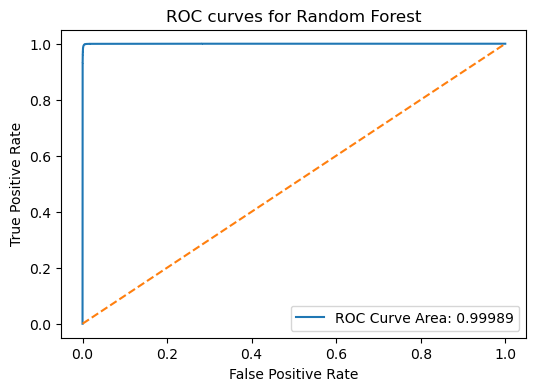

In [135]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_smote = train_y_prob_smote[:, 1]
fpr, tpr, thresholds = roc_curve(train_y_smote, predicted_y_smote)
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

In [136]:
test_y_predicted_smote = model_xgb_smote.predict(test_x_imputed)
test_y_prob_smote = model_xgb_smote.predict_proba(test_x_imputed)
conf_matrix = confusion_matrix(test_y_changed, test_y_predicted_smote)
print(f'Confusion Matrix: \n{conf_matrix}\n')

Confusion Matrix: 
[[15168   457]
 [   27   348]]



In [137]:
TN=conf_matrix[0][0]
FN=conf_matrix[1][0]
TP=conf_matrix[1][1]
FP=conf_matrix[0][1]
recall_test_smote=round(TP/(TP+FN),4)
precision_test_smote=round(TP/(TP+FP),4)

In [138]:
test_accuracy_smote = round(accuracy_score(test_y_changed, test_y_predicted_smote), 4)
print(f' Test Accuracy Score: {test_accuracy_smote}')
test_error_smote=round(1 - test_accuracy_smote, 4)
print(f'Test Error: {test_error_smote}')

 Test Accuracy Score: 0.9698
Test Error: 0.0302


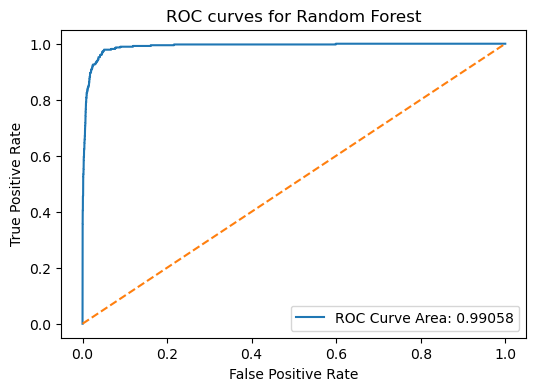

In [139]:
fig, axes = plt.subplots(figsize = (6, 4))
axes.set_title(f"ROC curves for Random Forest")
predicted_y_smote_test = test_y_prob_smote[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, predicted_y_smote_test, pos_label = 'pos')
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label = f"ROC Curve Area: {round(roc_auc, 5)}")
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
plt.show()

#### smote vs non smote

In [140]:
print("In terms of misclassification error rate:")
print("\nNon SMOTE:",test_error_xgb)
print("SMOTE:",test_error_smote)
if test_error_xgb>test_error_smote:
    print("\nRandom forest with smote performs better")
else:
    print("\nRandom forest with smote performs worser")
    
print("\nIn terms of recall:")
print("\nNon SMOTE:",recall_test_non_smote)
print("SMOTE:",recall_test_smote)
if recall_test_smote>recall_test_non_smote:
    print("\nRandom forest with smote performs better")
else:
    print("\nRandom forest with smote performs worser")
    
print("\nIn terms of precision:")
print("\nNon SMOTE:",precision_test_non_smote)
print("SMOTE:",precision_test_smote)
if precision_test_smote>precision_test_non_smote:
    print("\nRandom forest with smote performs better")
else:
    print("\nRandom forest with smote performs worser")


In terms of misclassification error rate:

Non SMOTE: 0.0061
SMOTE: 0.0302

Random forest with smote performs worser

In terms of recall:

Non SMOTE: 0.8027
SMOTE: 0.928

Random forest with smote performs better

In terms of precision:

Non SMOTE: 0.929
SMOTE: 0.4323

Random forest with smote performs worser


## 2. ISLR 6.6.3

(a) **Steadily Decrease:** As we increase the value of s from 0 to infinity, the training RSS will be steadily decreasing as we are overfitting more and more to the training dataset as the contraints over Betas are relaxed.

(b) **Decrease Initially and then eventually starts increasing in a new shape.** The test RSS will decrease initially as it learns more and more about the underlying relationship with relaxing constraints. But, after a certain point, the model will start to overfit the training dataset and performs poorly in predicting test data points. Hence, The error on test dataset starts to increase. 

(c) **Steadily Increases:** When s = 0, Betas are also almost 0. We have a null model that has the highest bias and lowest variance. when s = infinity, Betas are the same as OLS Betas. These have lowest bias and highest variance. Hence variance steadily increases as s moves from 0 to infinity.

(d) **Steadily Decrease:** As per above, since variance is increasing, bias will steadily decrease as s moves from 0 to infinity

(e) **Irreducible error** is the "act of god" and not reducible by any ML model. Hence it will remain constant.

## 3. ISLR 6.6.5

### a) 

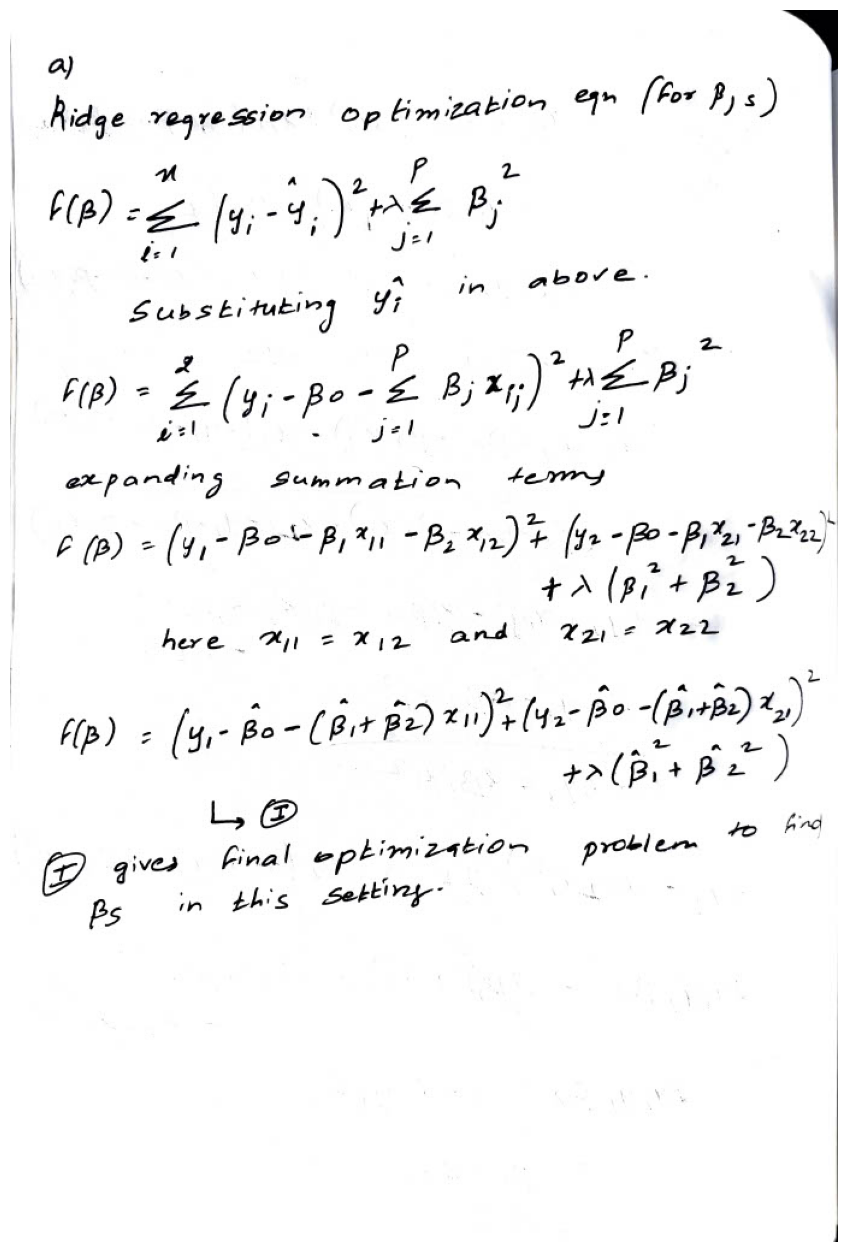

In [9]:
img = mpimg.imread('../data/Ques3a.jpg')
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

### b)

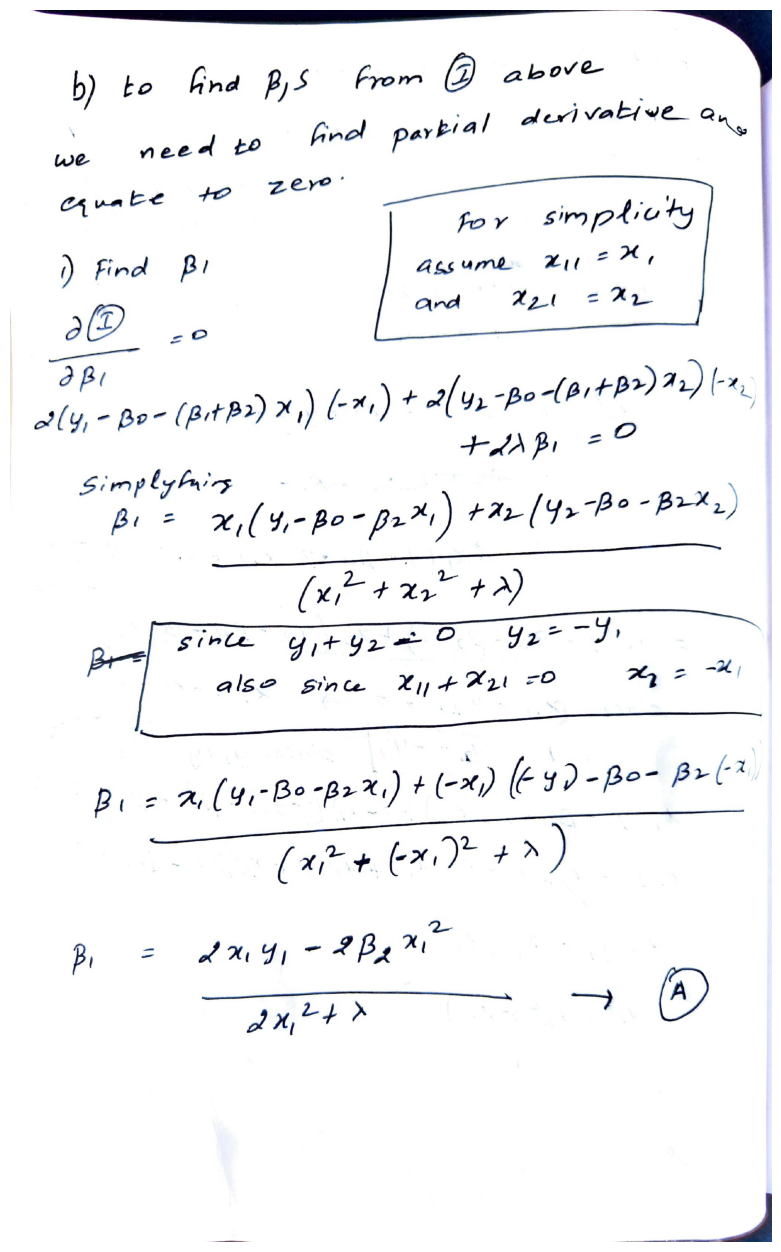

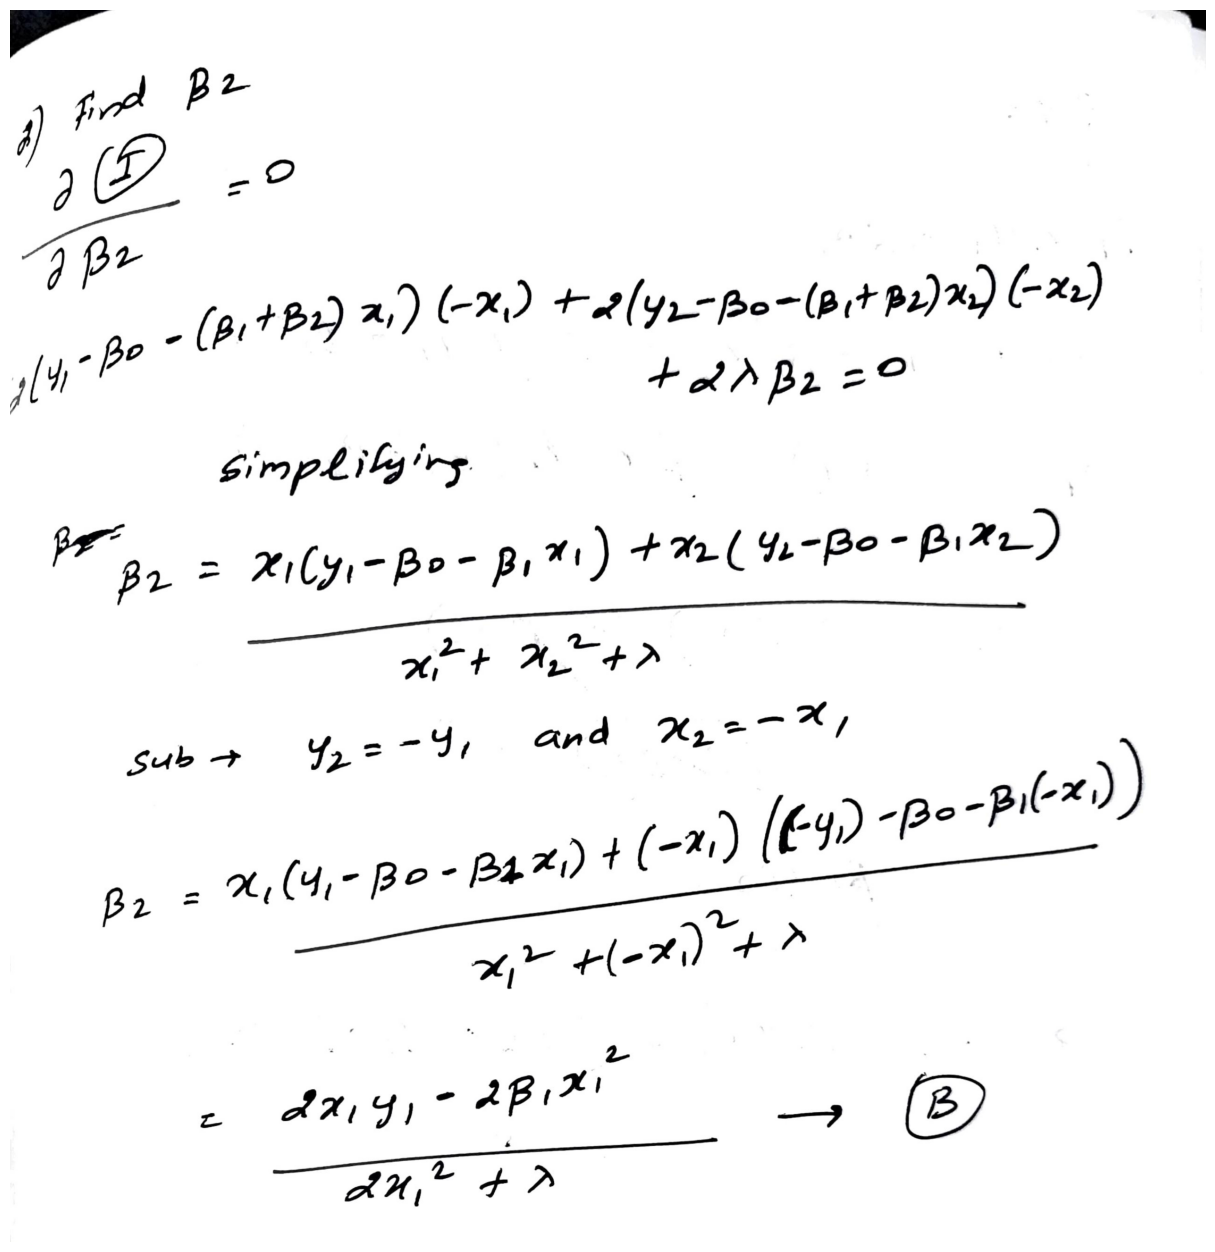

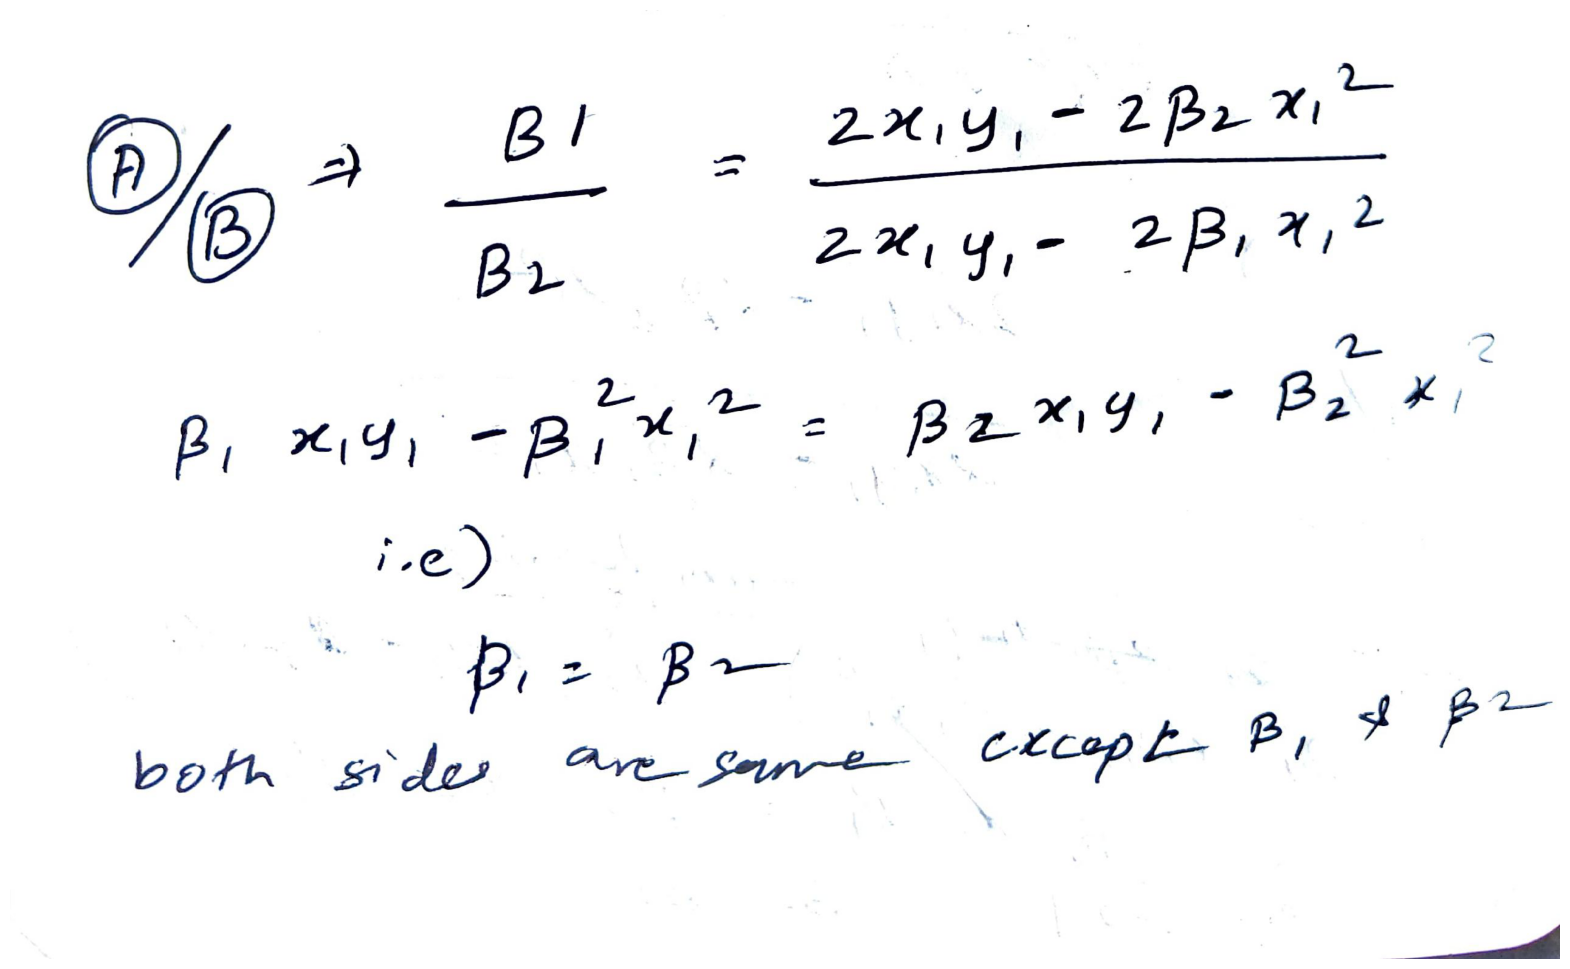

In [10]:
img = mpimg.imread('../data/Ques3b_1.jpg')
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
img = mpimg.imread('../data/Ques3b_2.jpg')
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
img = mpimg.imread('../data/Ques3b_3.jpg')
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

### c)

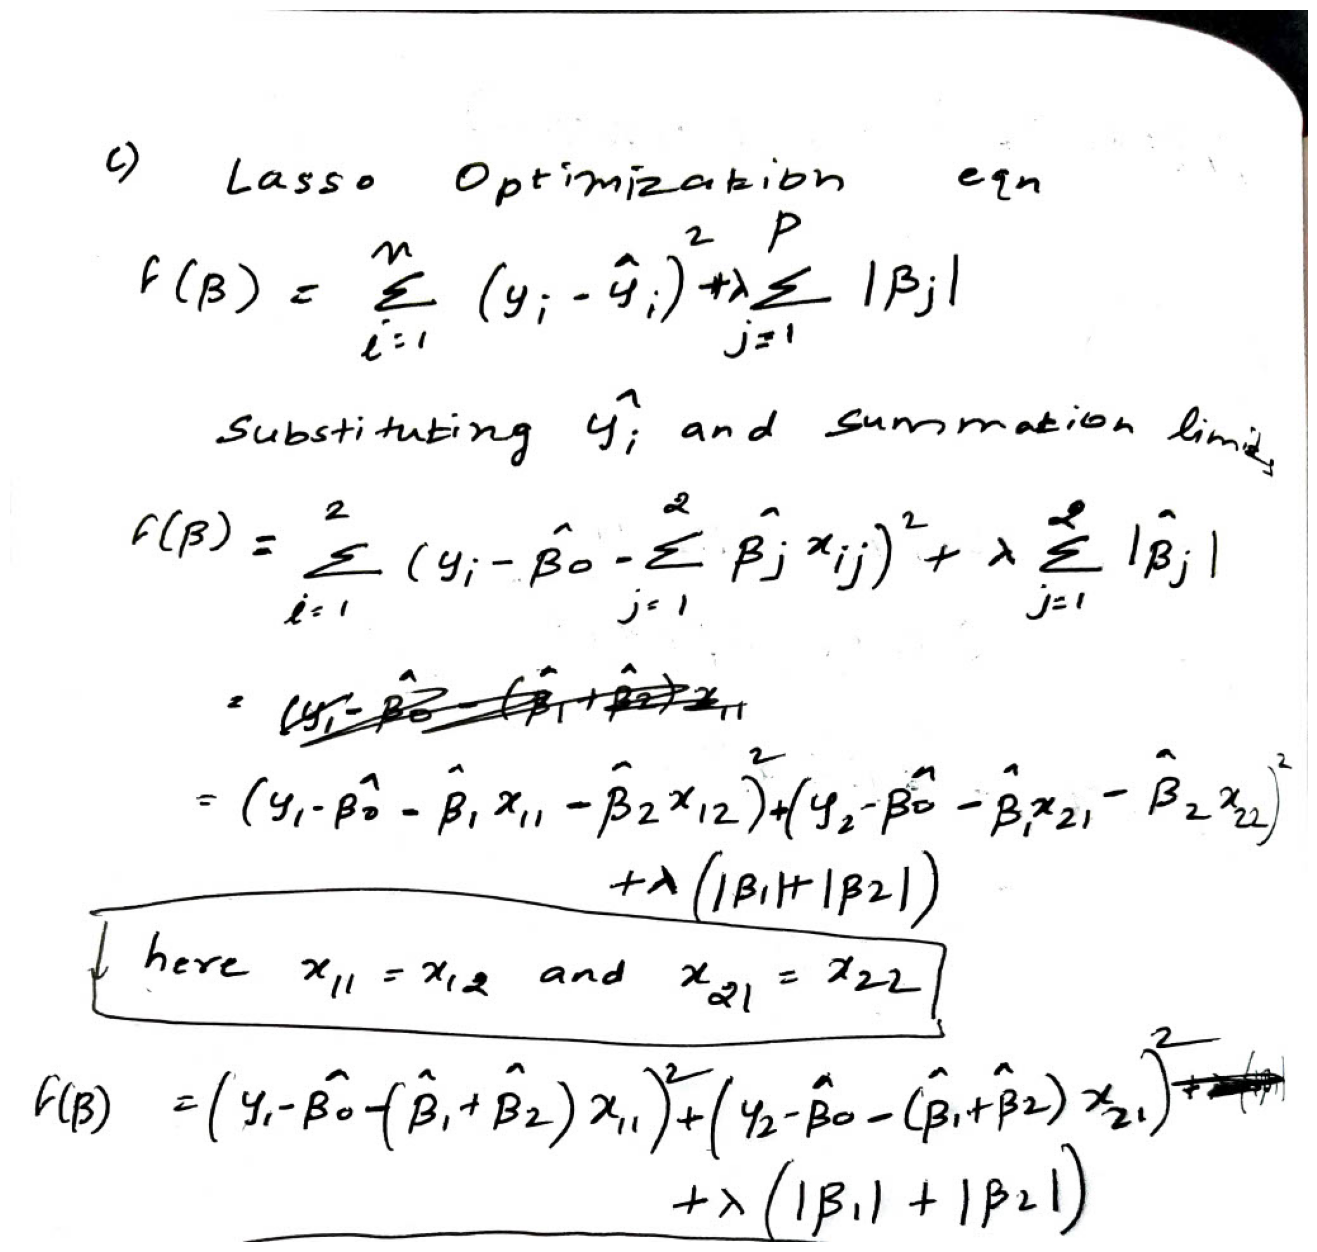

In [9]:
img = mpimg.imread('../data/Ques3c.jpg')
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

### d)

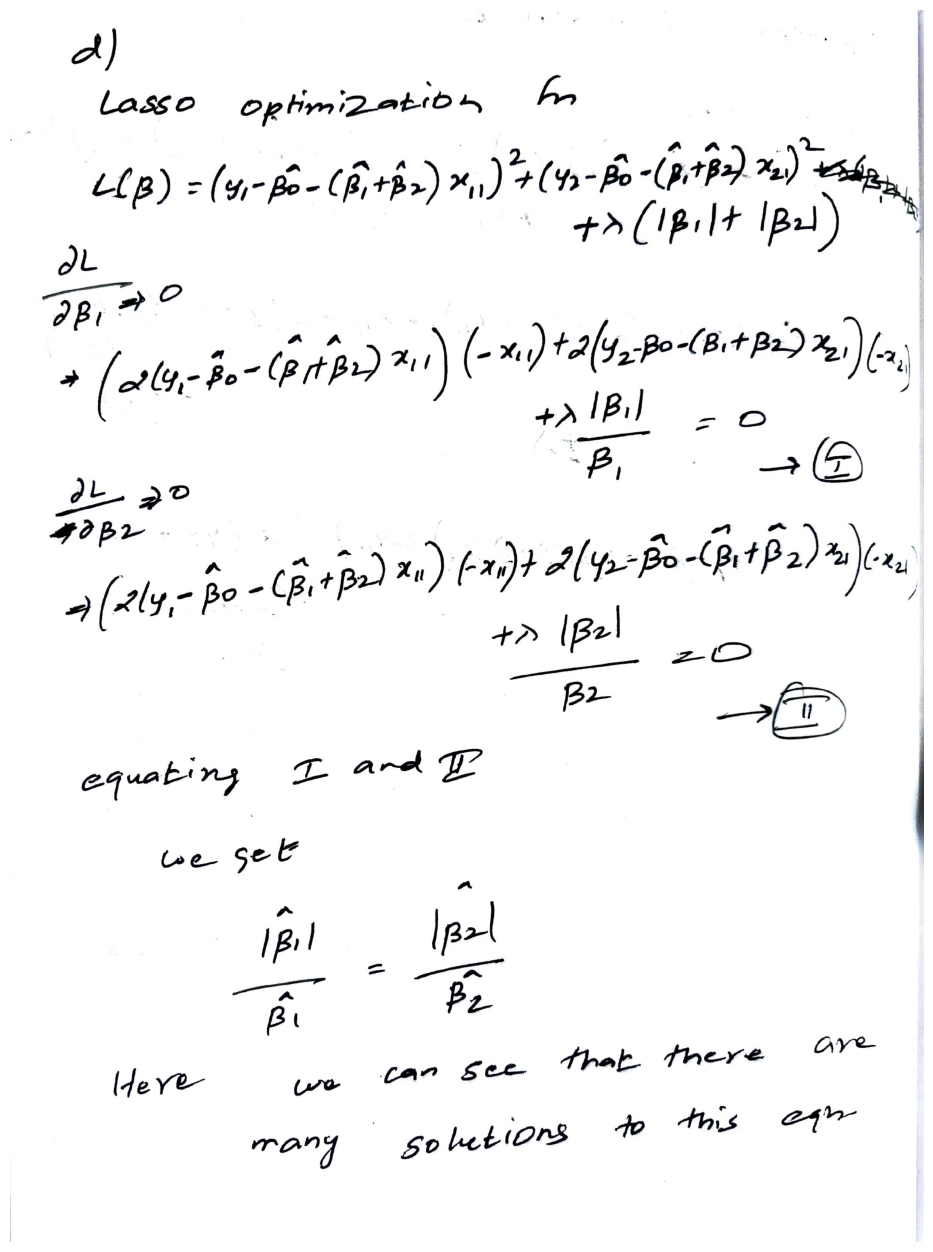

In [10]:
img = mpimg.imread('../data/Ques3d.jpg')
plt.figure(figsize=(20,16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

## 4. ISLR 8.4.5

1. **Majority Polling:**  Out of 10 samples, 4 samples have probability < 0.5 and 6 samples have probability >= 0.5. Since positive/True class is in majority, classification would be **red**.

2. **Average Probability:** Mean for given probabilities = 0.45 hence the classification would be **green**.

## 5. ISLR 9.7.3

In [5]:
sample_data = pd.DataFrame({'X1': [3, 2, 4, 1, 2, 4, 4], 
                   'X2':[4, 2, 4, 4, 1, 3, 1], 
                   'Y':['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})

sample_data['Y'].replace({'red': 0, 'blue': 1}, inplace = True)
train_x, train_y = sample_data.drop(['Y'], axis = 1), sample_data['Y']
model = svm.SVC(kernel = 'linear', C = 1000)
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

C:\Users\damie\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\damie\AppData\Local\Temp\ipykernel_26224\3502321575.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  ax[1].contour(x_axis, y_axis, z_axis, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,


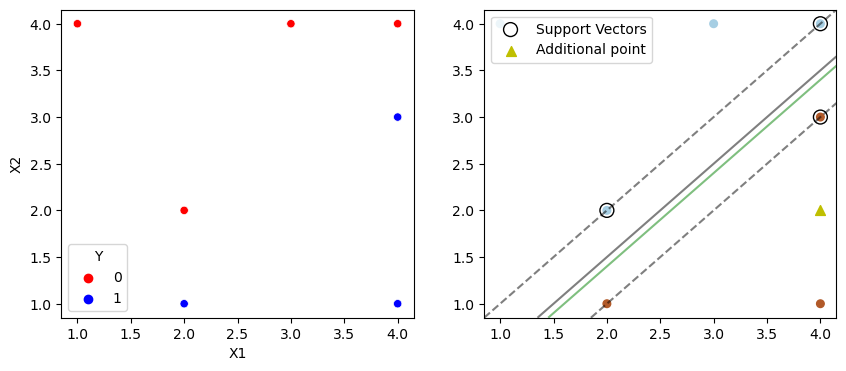

[-1.0004096] [[ 1.9998464 -1.9996928]]


In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(data = sample_data, x = "X1", y = "X2", hue = "Y", palette = ['red', 'blue'], ax = ax[0])

ax[1].scatter(sample_data.iloc[:, 0], sample_data.iloc[:, 1], 
              c = sample_data.iloc[:, -1], s = 30, cmap = plt.cm.Paired)

xlim, ylim = ax[1].get_xlim(), ax[1].get_ylim()
y_axis, x_axis = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(xlim[0], xlim[1], 30))
xy_axis = np.vstack([x_axis.ravel(), y_axis.ravel()]).T
z_axis = model.decision_function(xy_axis).reshape(x_axis.shape)

ax[1].contour(x_axis, y_axis, z_axis, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles=['--', '-', '--'], label = "Decision Boundary")
ax[1].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100,
           linewidth = 1, facecolors = 'none', edgecolors='k', label = "Support Vectors")
ax[1].contour(x_axis, y_axis, z_axis - 0.2, colors = 'g', levels = [0], alpha = 0.5,
           linestyles=['-'])
ax[1].scatter([4.0], [2.0], color = 'y', marker = '^', s = 50, label = "Additional point")
ax[1].legend(loc='upper left')

plt.show()
print(model.intercept_, model.coef_)

(a) Visulisation is shown above

(b) **The solid black** line is a hyperplane

(c) $\beta_0 = 1, \beta_1 = -1, \beta_2 = 2$ 

$\beta_0 + \beta_1 X_1 + \beta_2 X_2 >= 0$ implies red, otherwise blue

(d) **The dashed line** indicates the maximal margin.

(e) Support vectors are shown in **circled form**. 

(f) The seventh point is far away from the maximal margin hyperplane. If it is on the edge of the decision boundary, it will have effects, but it does not.

(g) **Solid green line** is not an optimal hyperplane. 

(h) The new point marked as a yellow triangle which makes it **not linearly separable**.